In [108]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm
import datetime as dt
import yfinance as yf
import pandas_datareader.data as pdr

In [116]:
def change(close, mean):
    last = close[-1]
    chg = mean/last - 1
    return chg
def get_data(stock_list, start, end):
    data = pdr.get_data_yahoo(stock_list, start, end)
    return data['Close']
def stock_performance(close):
    close.pct_change()
    mean_returns = close.mean()
    cov = close.cov()
    return mean_returns, cov

In [117]:
def MC(close, steps, simulations, random_seed):
    daily_returns = np.log(1 + close.pct_change())
    mu = np.mean(daily_returns)
    var = np.var(daily_returns)
    sigma = np.std(daily_returns)
    drift = mu - 0.5*var

    returns = np.exp(drift + sigma * norm.ppf(np.random.rand(steps, simulations)))
    np.random.seed(random_seed)
    sims = np.zeros((steps, simulations))
    sims[0] = close.iloc[-1]

    for step in range(1,steps):
        sims[step] = sims[step-1] * returns[step]
    return sims


def monteCarlo(close, steps, simulations, random_seed):

    sims = MC(close=close, steps=steps, simulations=simulations, random_seed=random_seed)
    mcmean = np.mean(sims[-1])
    mcvar = np.var(sims[-1])
    return mcmean, mcvar 

[*********************100%***********************]  1 of 1 completed


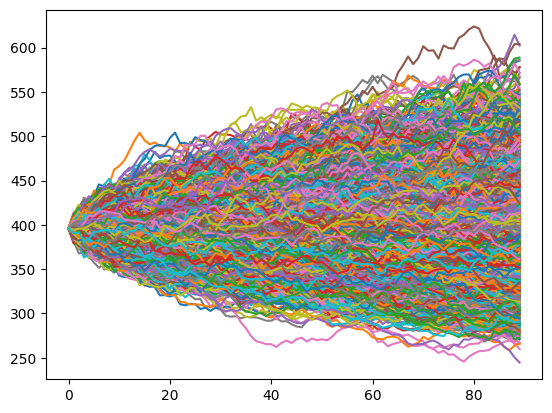

In [118]:
ticker = 'SPY'
#time period
end = dt.datetime.now()
start = end - dt.timedelta(720)


#bug fix
yf.pdr_override()

#get stock qoutes
close = get_data(ticker, start, end)

steps = 90
simulations = 10000  
random_seed = 1
sims = MC(close, steps, simulations, random_seed)
plt.plot(sims)
plt.show()

c:\Users\k_abo\.conda\envs\env\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


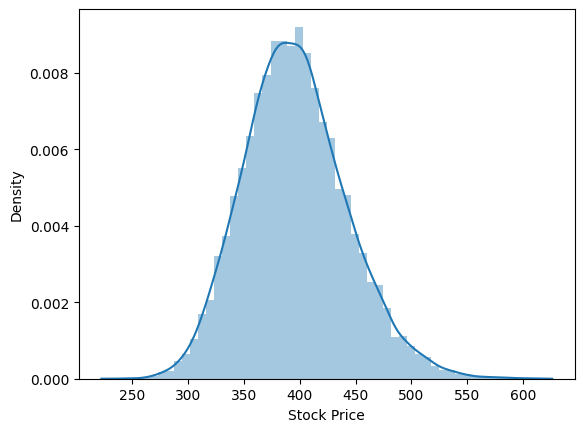

In [119]:
sns.distplot(sims[-1])
plt.xlabel('Stock Price')
plt.show()

In [120]:
mcmean = np.mean(sims[-1])
mcmean

396.2399908159346

In [121]:
print(close[-1])
print(mcmean)
change(close, mcmean)

395.94049072265625
396.2399908159346


0.0007564270396587247